In [27]:
%config IPCompleter.use_jedi=False

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

El objetivo de esta práctica es trabajar con algunas de las técnicas de selección de características estudiadas en  las sesiones teóricas utilizando scikit learn.

Se propone el estudio de la selección mediante filtros. Para ello, se presenta un ejemplo completo de selección de características en el caso de predictores categóricos y respuesta categórica. El ejemplo incluye:

* Lectura de un dataset
* Codificación del dataset
* Selección de características usando $\chi^{2}$
* Selección de características usando *mutual information*
* Comparación de ambas selecciones usando un modelo de test

La tarea propuesta consiste en completar los otros dos casos propuestos en este block de notas (notebook) de manera análoga al caso anteriormente expuesto.

Para ello será necesario estudiar y comprender el caso resuelto y usar la documentación de scikitlearn para resolver los dos casos pendientes:
* Predictores numéricos, respuesta categórica
* Predictores numéricos, respuesta numérica

El entregable de esta tarea consistirá en un libro de notas (notebook), con los siguientes requisitos, completado por el estudiante:

* Código para resolver los casos propuestos
* Comentarios al código en **todos** los casos (incluido el ejemplo que está resuelto)



# Filtros

## Predictores categóricos, respuesta categórica

dataset: `breast-cancer`

### Lectura y codificación del dataset

In [28]:
# example of mutual information feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc


# load the dataset
X, y = load_dataset('./datos/'+'breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [29]:
column_names = ['age', 'menopause', 'tumor-size', 'inv-nodes', 
                'node-caps','deg-malig', 'breast', 'breast-quad','Class']
pd.DataFrame(X_train, columns=column_names)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,Class
0,'50-59','ge40','25-29','0-2','no','1','left','right_low','no'
1,'30-39','premeno','5-9','0-2','no','2','left','right_low','no'
2,'50-59','premeno','50-54','0-2','yes','2','right','left_up','yes'
3,'30-39','premeno','25-29','0-2','no','1','left','central','no'
4,'40-49','premeno','20-24','0-2','no','2','right','right_up','no'
...,...,...,...,...,...,...,...,...,...
186,'40-49','premeno','25-29','0-2','no','1','right','right_low','no'
187,'50-59','premeno','25-29','0-2','no','3','right','left_low','yes'
188,'60-69','ge40','10-14','0-2','no','1','right','left_low','no'
189,'60-69','ge40','40-44','0-2','no','2','right','left_low','no'


In [30]:
pd.DataFrame(X_train_enc, columns=column_names)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,Class
0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0
1,1.0,2.0,9.0,0.0,0.0,1.0,0.0,3.0,0.0
2,3.0,2.0,10.0,0.0,1.0,1.0,1.0,2.0,1.0
3,1.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,3.0,0.0,0.0,1.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...
186,2.0,2.0,4.0,0.0,0.0,0.0,1.0,3.0,0.0
187,3.0,2.0,4.0,0.0,0.0,2.0,1.0,1.0,1.0
188,4.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
189,4.0,0.0,7.0,0.0,0.0,1.0,1.0,1.0,0.0


### Mutual information

[0.0, 0.0, 0.0, 0.0, 0.00390934090973083, 0.010578250884351048, 0.01577263620254632, 0.030627597181116517, 0.08370532981928136]
Feature 0: 0.000000
Feature 1: 0.000000
Feature 2: 0.030628
Feature 3: 0.015773
Feature 4: 0.000000
Feature 5: 0.083705
Feature 6: 0.003909
Feature 7: 0.000000
Feature 8: 0.010578


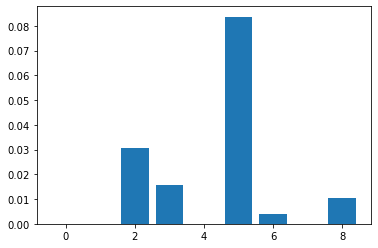

In [31]:
# feature selection mutual information
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
print(sorted(fs.scores_))
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### $\chi^{2}$     (chi cuadrado)

(191, 4)
Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


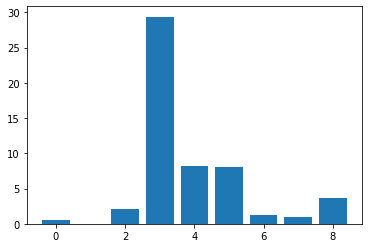

In [32]:
# feature selection
from sklearn.feature_selection import chi2

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
print(X_train_fs.shape)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

¿Cómo saber qué características se han seleccionado?

In [33]:
print(fs.get_support())
print(np.nonzero(fs.get_support()))
print([column_names[idx] for (idx, item) in enumerate(fs.get_support()) if item])

[False False False  True  True  True False False  True]
(array([3, 4, 5, 8], dtype=int64),)
['inv-nodes', 'node-caps', 'deg-malig', 'Class']


### Comparación de rendimiento

Evaluación de las dos selecciones de características usando como referencia un modelo de regresión logística

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def mi_mutual_info_classif(*args):
    score = mutual_info_classif(args[0], args[1], 
                                discrete_features=True)
    return score

def select_features(X_train, y_train, X_test, func, k=4):
    fs = SelectKBest(score_func=func, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

l = []
model = LogisticRegression(solver='lbfgs')

for k in range(1, 10):
#     print(f'k={k}')

    # feature selection
    X_train_fs, X_test_fs, fs = select_features(X_train_enc, 
                                                y_train_enc, 
                                                X_test_enc, chi2, k)
    # fit the model using MI
    model.fit(X_train_fs, y_train_enc)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    accuracy = accuracy_score(y_test_enc, yhat)
#     print('Accuracy chi2: %.2f' % (accuracy*100))

    # feature selection
    X_train_fs, X_test_fs, fs = select_features(X_train_enc, 
                                                y_train_enc, 
                                                X_test_enc,
#                                                 mutual_info_classif,
                                                mi_mutual_info_classif,
                                                k)

    # fit the model using mutual information
    model.fit(X_train_fs, y_train_enc)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    accuracy_mi = accuracy_score(y_test_enc, yhat)
#     print('Accuracy mut. inf.: %.2f' % (accuracy_mi*100))
#     print('')
    l += [(k, accuracy, accuracy_mi)]

,chi2,mi
1,0.673684,0.652632
2,0.663158,0.673684
3,0.736842,0.768421
4,0.747368,0.736842
5,0.736842,0.747368
6,0.747368,0.747368
7,0.747368,0.736842
8,0.757895,0.757895
9,0.757895,0.757895


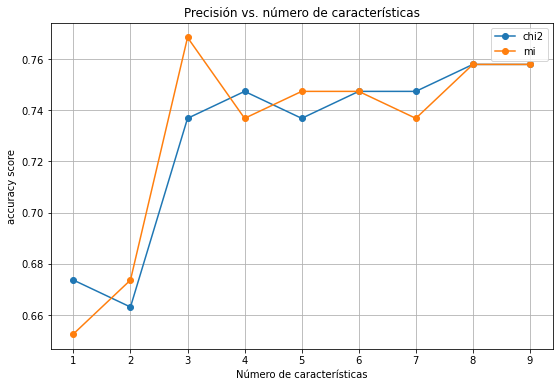

In [35]:
df = pd.DataFrame({'chi2': [k for _, k, _ in l],
                   'mi': [k for _, _, k in l]}, index=range(1,10))
from IPython.display import display
display(df)

df.plot(style='o-', grid=True, figsize=(9,6),
        xticks=[i for i in range(1,10)],
        title='Precisión vs. número de características', 
        xlabel='Número de características',
        ylabel='accuracy score')
plt.show()

## Predictores numéricos, respuesta categórica

dataset: `pima-indians-diabetes`

### Lectura del dataset

In [36]:
X, y = load_dataset("datos/pima-indians-diabetes.csv")
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.67, random_state=1)
ytrain_enc, ytest_enc = prepare_targets(ytrain, ytest)
pd.DataFrame(X, y)

,0,1,2,3,4,5,6,7
1.0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
0.0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
1.0,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
0.0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
1.0,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
0.0,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
0.0,2.0,122.0,70.0,27.0,0.0,36.8,0.34,27.0
0.0,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
1.0,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


### Estadístico F

(514, 4)
Feature 0: 16.527385
Feature 1: 131.325562
Feature 2: 0.042371
Feature 3: 1.415216
Feature 4: 12.778966
Feature 5: 49.209523
Feature 6: 13.377142
Feature 7: 25.126440


C:\Users\sergi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


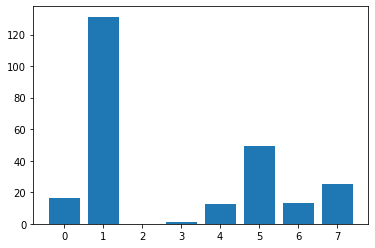

In [37]:
from sklearn.feature_selection import f_classif

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_classif, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Xtrain_fs_f, Xtest_fs_f, fs_f = select_features(Xtrain, ytrain_enc, Xtest)
print(Xtrain_fs_f.shape)

for i in range(len(fs_f.scores_)):
    print('Feature %d: %f' % (i, fs_f.scores_[i]))

pyplot.bar([i for i in range(len(fs_f.scores_))], fs_f.scores_)
pyplot.show()

Observamos que usando el estadístico F obtenemos que las 4 características con mayor importancia son la 1, 5, 7 y 0.

### Mutual information (caso clasificación)

C:\Users\sergi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


(514, 4)
Feature 0: 0.026685
Feature 1: 0.092399
Feature 2: 0.005787
Feature 3: 0.000000
Feature 4: 0.035712
Feature 5: 0.081975
Feature 6: 0.020326
Feature 7: 0.049893


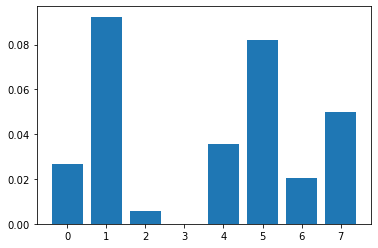

In [38]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
Xtrain_fs_m, Xtest_fs_m, fs_m = select_features(Xtrain, ytrain_enc, Xtest)
print(Xtrain_fs_m.shape)
# what are scores for the features
for i in range(len(fs_m.scores_)):
    print('Feature %d: %f' % (i, fs_m.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs_m.scores_))], fs_m.scores_)
pyplot.show()

En cambio, usando mutual information en el caso de clasificación obtenemos que las 4 características más importantes son la 1, 5, 4 y 0.

### Modelo con todas las características

Usar el modelo `LogisticRegression(solver='liblinear')` y la métrica `accuracy_score`

In [39]:
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver='liblinear').fit(Xtrain, ytrain_enc)
print(accuracy_score(model.predict(Xtest), ytest))

0.7755905511811023


C:\Users\sergi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


### Modelo con las 4 mejores características descubiertas con F

In [40]:
model = LogisticRegression(solver='liblinear').fit(Xtrain_fs_f, ytrain_enc)
print(accuracy_score(model.predict(Xtest_fs_f), ytest))

0.7874015748031497


C:\Users\sergi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


### Modelo con las 4 mejores características descubiertas con *mutual information*

In [41]:
model = LogisticRegression(solver='liblinear').fit(Xtrain_fs_m, ytrain_enc)
print(accuracy_score(model.predict(Xtest_fs_m), ytest))

0.7755905511811023


C:\Users\sergi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


Observamos que el modelo entrenado con todas las características tiene una precisión ligeramente menor que el que fue entrenado con las 4 características seleccionadas con el estadístico F y el que fue entrenado con las 4 seleccionadas con mutual information. El mejor modelo es el del estadístico F.

### Comparativa de resultados  y comentarios

In [42]:
def mi_mutual_info_classif(*args):
    score = mutual_info_classif(args[0], args[1], 
                                discrete_features=False)
    return score

def select_features(X_train, y_train, X_test, func, k=4):
    fs = SelectKBest(score_func=func, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

l = []
model = LogisticRegression(solver='liblinear')

for k in range(1, 9):
#     print(f'k={k}')

    # feature selection
    Xtrain_fs_f, Xtest_fs_f, fs_f = select_features(Xtrain, 
                                                ytrain_enc, 
                                                Xtest, f_classif, k)
    # fit the model using MI
    model.fit(Xtrain_fs_f, ytrain_enc)
    # evaluate the model
    yhat = model.predict(Xtest_fs_f)
    # evaluate predictions
    accuracy = accuracy_score(ytest_enc, yhat)
#     print('Accuracy chi2: %.2f' % (accuracy*100))

    # feature selection
    Xtrain_fs_m, Xtest_fs_m, fs_m = select_features(Xtrain, 
                                                ytrain_enc, 
                                                Xtest,
#                                                 mutual_info_classif,
                                                mi_mutual_info_classif,
                                                k)

    # fit the model using mutual information
    model.fit(Xtrain_fs_m, ytrain_enc)
    # evaluate the model
    yhat = model.predict(Xtest_fs_m)
    # evaluate predictions
    accuracy_mi = accuracy_score(ytest_enc, yhat)
#     print('Accuracy mut. inf.: %.2f' % (accuracy_mi*100))
#     print('')
    l += [(k, accuracy, accuracy_mi)]

C:\Users\sergi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\sergi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\sergi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly

C:\Users\sergi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\sergi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\sergi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly

,f,mutual info
1,0.755906,0.755906
2,0.759843,0.759843
3,0.775591,0.775591
4,0.787402,0.783465
5,0.779528,0.775591
6,0.779528,0.791339
7,0.783465,0.767717
8,0.775591,0.775591


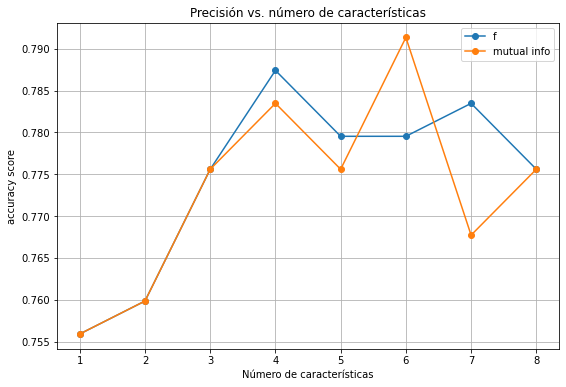

In [43]:
df = pd.DataFrame({'f': [k for _, k, _ in l],
                   'mutual info': [k for _, _, k in l]}, index=range(1,9))
display(df)

df.plot(style='o-', grid=True, figsize=(9,6),
        xticks=[i for i in range(1,9)],
        title='Precisión vs. número de características', 
        xlabel='Número de características',
        ylabel='accuracy score')
plt.show()

Asimismo, vemos que con hasta 3 características obtenemos la misma precisión usando los dos métodos de selección, pero con 4 obtenemos un resultado significativamente mejor con el estadístico F que con mutual information. Sin embargo, con 7 características obtenemos un buen resultado para ambos métodos.

## Predictores numéricos, respuesta numérica

En este caso usaremos un dataset sintético, generado con la función `make_regression()` de scikit learn

### Generación del dataset sintético

In [44]:
from sklearn.datasets import make_regression

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10,
                       noise=0.1, random_state=1)
# split into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33,
                                                    random_state=1)
# summarize
print('Train', Xtrain.shape, ytrain.shape)
print('Test', Xtest.shape, ytest.shape)

Train (670, 100) (670,)
Test (330, 100) (330,)


### Regresion (`f_regression()`)

(670, 10)
Feature 0: 0.009419
Feature 1: 1.018881
Feature 2: 1.205187
Feature 3: 0.000138
Feature 4: 0.167511
Feature 5: 5.985083
Feature 6: 0.062405
Feature 7: 1.455257
Feature 8: 0.420384
Feature 9: 101.392225
Feature 10: 0.387091
Feature 11: 1.581124
Feature 12: 3.014463
Feature 13: 0.232705
Feature 14: 0.076281
Feature 15: 4.299652
Feature 16: 1.497530
Feature 17: 0.261242
Feature 18: 5.960005
Feature 19: 0.523219
Feature 20: 0.003365
Feature 21: 0.024178
Feature 22: 0.220958
Feature 23: 0.576770
Feature 24: 0.627198
Feature 25: 0.350687
Feature 26: 0.281877
Feature 27: 0.584210
Feature 28: 52.196337
Feature 29: 0.046855
Feature 30: 0.147323
Feature 31: 0.368485
Feature 32: 0.077631
Feature 33: 0.698140
Feature 34: 45.744046
Feature 35: 2.047376
Feature 36: 0.786270
Feature 37: 0.996190
Feature 38: 2.733533
Feature 39: 63.957656
Feature 40: 231.885540
Feature 41: 1.372448
Feature 42: 0.581860
Feature 43: 1.072930
Feature 44: 1.066976
Feature 45: 0.344656
Feature 46: 13.951551
Featu

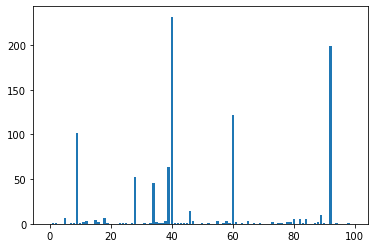

(670, 10)

In [45]:
from sklearn.feature_selection import f_regression

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k=10)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
Xtrain_fs, Xtest_fs, fs = select_features(Xtrain, ytrain, Xtest)
print(Xtrain_fs.shape)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()
Xtrain_fs.shape

En este caso, al realizar la selección de características mediante el estadístico F se obtienen las características 5, 9, 28, 34, 39, 40, 46, 60, 89 y 92.

### Mutual information (caso regresión)

(670, 10)
Feature 0: 0.045484
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.024816
Feature 5: 0.000000
Feature 6: 0.022659
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.074320
Feature 10: 0.000000
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.000000
Feature 14: 0.020390
Feature 15: 0.004307
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.016566
Feature 19: 0.003688
Feature 20: 0.007579
Feature 21: 0.018640
Feature 22: 0.025206
Feature 23: 0.017967
Feature 24: 0.069173
Feature 25: 0.000000
Feature 26: 0.022232
Feature 27: 0.000000
Feature 28: 0.007849
Feature 29: 0.012849
Feature 30: 0.017402
Feature 31: 0.008083
Feature 32: 0.047321
Feature 33: 0.002829
Feature 34: 0.028968
Feature 35: 0.000000
Feature 36: 0.071652
Feature 37: 0.027969
Feature 38: 0.000000
Feature 39: 0.064796
Feature 40: 0.137695
Feature 41: 0.008732
Feature 42: 0.003983
Feature 43: 0.000000
Feature 44: 0.009387
Feature 45: 0.000000
Feature 46: 0.038385
Feature 47: 0

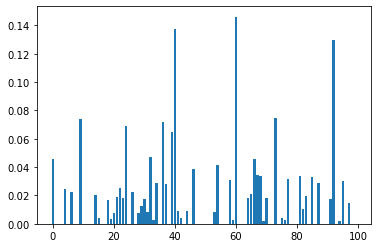

In [46]:
from sklearn.feature_selection import mutual_info_regression

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_regression, k=10)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
Xtrain_fs_m, Xtest_fs_m, fs_m = select_features(Xtrain, ytrain, Xtest)
print(Xtrain_fs_m.shape)
# what are scores for the features
for i in range(len(fs_m.scores_)):
    print('Feature %d: %f' % (i, fs_m.scores_[i]))
print(sorted(fs_m.scores_))
# plot the scores
pyplot.bar([i for i in range(len(fs_m.scores_))], fs_m.scores_)
pyplot.show()

En el caso de usar mutual information, obtenemos las características 9, 24, 32, 36, 39, 40, 60, 66, 73 y 92.

### Modelo con todas las características

Usar el modelo `LinearRegression()` y la métrica `mean_absolute_error`

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(Xtrain, ytrain)
print(mean_absolute_error(model.predict(Xtest), ytest))

0.08569191074144228


### Modelo con las 10 mejores características obtenidas con la regresión

In [48]:
model = LinearRegression().fit(Xtrain_fs, ytrain)
print(mean_absolute_error(ytest, model.predict(Xtest_fs)))

2.739756085615071


### Modelo con las 10 mejores características obtenidas con *mutual information*

In [49]:
model = LinearRegression().fit(Xtrain_fs_m, ytrain)
print(mean_absolute_error(ytest, model.predict(Xtest_fs_m)))

68.20958123062528


A diferencia que en el caso de clasificación, el modelo con todas las características produce mejores resultados que los que tienen solo 10 características.

### Comparativa de resultados y comentarios

In [50]:
def select_features(X_train, y_train, X_test, func, k=10):
    fs = SelectKBest(score_func=func, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

l = []
model = LinearRegression()

for k in range(1, 11):

    # feature selection
    Xtrain_fs_f, Xtest_fs_f, fs_f = select_features(Xtrain, 
                                                ytrain, 
                                                Xtest, f_regression, k)
    # fit the model using MI
    model.fit(Xtrain_fs_f, ytrain)
    # evaluate the model
    yhat = model.predict(Xtest_fs_f)
    # evaluate predictions
    error = mean_absolute_error(ytest, yhat)

    # feature selection
    Xtrain_fs_m, Xtest_fs_m, fs_m = select_features(Xtrain, 
                                                ytrain, 
                                                Xtest,
                                                mutual_info_regression,
                                                k)

    # fit the model using mutual information
    model.fit(Xtrain_fs_m, ytrain)
    # evaluate the model
    yhat = model.predict(Xtest_fs_m)
    # evaluate predictions
    error_mi = mean_absolute_error(ytest, yhat)
    l += [(k, error, error_mi)]

,f,mutual info
1,136.641332,148.782122
2,116.514517,125.054197
3,96.863183,96.863183
4,77.831844,97.133275
5,68.227554,78.286641
6,55.249695,78.727341
7,32.906988,78.833757
8,16.392450,68.258883
9,2.731532,68.209634
10,2.739756,68.209581


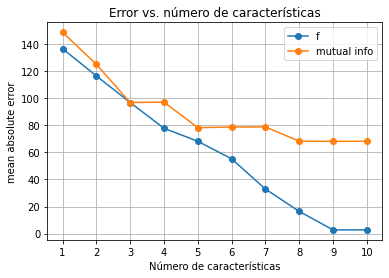

In [51]:
df = pd.DataFrame({'f': [k for _, k, _ in l],
                   'mutual info': [k for _, _, k in l]}, index=range(1,11))
display(df)

df.plot(style='o-', grid=True,
        xticks=[i for i in range(1,11)],
        title='Error vs. número de características', 
        xlabel='Número de características',
        ylabel='mean absolute error')
plt.show()

Se observa que en los dos casos, a medida que se aumenta el número de características aumenta, el error absoluto medio es menor. Sin embargo, el error disminuye en mayor medida en el caso del estadístico F, llegando a valores bastante bajos comparados con los obtenidos con mutual information.